#Este Notebook muestra los gráficos exploratorios usados en el documento del trabajo de grado

## Datasets usados

In [ ]:
#GCargamos los paquetes
import numpy as np
import pandas as pd
import math as m
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Datos de Li et al. (2020) crudos
datos_o = pd.read_csv('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/lamostdr7_gaiadr2_hvs_591.csv', header=0, delimiter = ',')

In [ ]:
datos_o['Origin_Class'][datos_o['astrometric_flag']==1][datos_o['Origin_Class']=='RS']

100    RS
110    RS
120    RS
148    RS
150    RS
       ..
584    RS
587    RS
588    RS
589    RS
590    RS
Name: Origin_Class, Length: 175, dtype: object

In [ ]:
# Instalamos tabulate para generar tablas tipo LateX
pip install tabulate

In [ ]:
from tabulate import tabulate

In [ ]:
datos_o.columns

Index(['ID', 'specid', 'Gaia_designation', 'R.A.', 'e_R.A.', 'decl.',
       'e_decl.', 'S/N_r', 'Class', 'RV_LASP', 'e_RV_LASP', 'pmra', 'e_pmra',
       'pmdec', 'e_pmdec', 'parallax', 'e_parallax', 'G', 'G_BP', 'G_RP',
       'astrometric_flag', 'RV_LASP_Calibrated', 'r', 'el_r', 'eu_r', 'x',
       'el_x', 'eu_x', 'y', 'el_y', 'eu_y', 'z', 'el_z', 'eu_z', 'r_GC',
       'el_r_GC', 'eu_r_GC', 'Vx', 'el_Vx', 'eu_Vx', 'Vy', 'el_Vy', 'eu_Vy',
       'Vz', 'el_Vz', 'eu_Vz', 'V_GC', 'el_V_GC', 'eu_V_GC', 'e', 'el_e',
       'eu_e', 'Zmax', 'el_Zmax', 'eu_Zmax', 'r_min', 'el_r_min', 'eu_r_min',
       'E_Phi_Infinity', 'el_E_Phi_Infinity', 'eu_E_Phi_Infinity', 'Vesc(W)',
       'Vesc(G)', 'Vesc(Ke)', 'Vesc(Ko)', 'Vesc(P)', 'Vesc(M)', 'Vesc(X)',
       'Pgc', 'PMW', 'Pub(W)', 'Pub(G)', 'Pub(Ke)', 'Pub(Ko)', 'Pub(P)',
       'Pub(M)', 'Pub(X)', 'Origin_Class', 'Teff_LASP', 'e_Teff_LASP',
       'log(g)_LASP', 'e_log(g)_LASP', '[Fe/H]_LASP', 'e_[Fe/H]_LASP',
       'Teff_DD-Payne', 'e_Teff_D

In [ ]:
#Seleccionamos las columnas que nos interesan
cols_int = ['ID',	'R.A.', 'decl.',\
            'S/N_r', 'Class', 'pmra',\
            'r', 'x',\
            'y','z','r_GC']
estrellas_all=datos_o[cols_int]
estrellas_all.head(10)

,ID,R.A.,decl.,S/N_r,Class,pmra,r,x,y,z,r_GC
0,Hivel1,240.337348,41.166774,158,G7,-25.759,8.5,-5.9,5.1,6.4,10.1
1,Hivel2,193.437050,55.057917,29,F9,-23.742,5.0,-9.4,2.0,4.5,10.6
2,Hivel3,102.484330,46.835595,34,K5,142.070,0.7,-8.9,0.1,0.3,8.9
3,Hivel4,171.774653,42.407869,135,A1V,-39.672,4.7,-10.0,0.5,4.4,10.9
4,Hivel5,212.477709,33.712932,34,F6,-17.612,9.5,-6.7,2.5,9.0,11.5
5,Hivel6,240.515348,9.525196,154,G2,-3.737,8.0,-2.6,2.1,5.3,6.3
6,Hivel7,214.976197,37.669342,32,F0,-42.914,4.5,-7.6,1.5,4.2,8.8
7,Hivel8,194.771479,-2.547196,127,G7,26.920,1.4,-7.8,-0.6,1.2,7.9
8,Hivel9,231.848617,36.034415,174,G5,-15.238,9.7,-5.3,4.6,8.0,10.6
9,Hivel10,329.705708,1.355877,24,F7,-21.883,4.6,-6.4,3.1,-2.9,7.7


In [ ]:
#Generamos la tabla tipo LateX
print(tabulate(estrellas_all.head(10), cols_int, tablefmt="latex"))

\begin{tabular}{rlrrrlrrrrrr}
\hline
    & ID      &    R.A. &    decl. &   S/N\_r & Class   &    pmra &   r &     x &    y &    z &   r\_GC \\
\hline
  0 & Hivel1  & 240.337 & 41.1668  &     158 & G7      & -25.759 & 8.5 &  -5.9 &  5.1 &  6.4 &   10.1 \\
  1 & Hivel2  & 193.437 & 55.0579  &      29 & F9      & -23.742 & 5   &  -9.4 &  2   &  4.5 &   10.6 \\
  2 & Hivel3  & 102.484 & 46.8356  &      34 & K5      & 142.07  & 0.7 &  -8.9 &  0.1 &  0.3 &    8.9 \\
  3 & Hivel4  & 171.775 & 42.4079  &     135 & A1V     & -39.672 & 4.7 & -10   &  0.5 &  4.4 &   10.9 \\
  4 & Hivel5  & 212.478 & 33.7129  &      34 & F6      & -17.612 & 9.5 &  -6.7 &  2.5 &  9   &   11.5 \\
  5 & Hivel6  & 240.515 &  9.5252  &     154 & G2      &  -3.737 & 8   &  -2.6 &  2.1 &  5.3 &    6.3 \\
  6 & Hivel7  & 214.976 & 37.6693  &      32 & F0      & -42.914 & 4.5 &  -7.6 &  1.5 &  4.2 &    8.8 \\
  7 & Hivel8  & 194.771 & -2.5472  &     127 & G7      &  26.92  & 1.4 &  -7.8 & -0.6 &  1.2 &    7.9 \\
  8 & Hiv

In [ ]:
#Cargamos las 476 estrellas (sin las de astrometric_flag=0) estrellas con columnas de Luminosidad, otras Masas, etc. (reemplaza los datos crudos)
datos = pd.read_csv('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/Modif_591_HiVelSCs.csv', header=0, delimiter = '\t')

In [ ]:
#Expresamos las masas de las estrellas en masas solares
M_sun = 1.9885e30
datos['Masas_M_sun_v1'] = datos['Mass']/M_sun

In [ ]:
datos

,Unnamed: 0,ID,Origin_Class,G,G_BP,G_RP,Class,r,x,y,...,Pub(Ke),Pub(Ko),Pub(P),Pub(M),Pub(X),Mabs,Luminosity,L_Lsun,Mass,Masas_M_sun_v1
0,1,Hivel2,HRS,15.63,13.89,13.19,F9,5.0,-9.4,2.0,...,1.000,1.000,1.000,1.000,1.000,2.135150,4.000904e+27,10.421735,3.887703e+30,1.955093
1,4,Hivel5,OUT,13.09,13.51,12.51,F6,9.5,-6.7,2.5,...,0.984,0.990,0.997,0.999,1.000,-1.798618,1.498530e+29,390.343733,1.094628e+31,5.504793
2,5,Hivel6,OUT,13.63,12.54,12.35,G2,8.0,-2.6,2.1,...,0.904,0.951,0.981,0.989,0.997,-0.885450,6.462463e+28,168.337151,8.608044e+30,4.328913
3,6,Hivel7,HRS,15.83,19.17,19.25,F0,4.5,-7.6,1.5,...,0.953,0.981,0.995,0.998,1.000,2.563937,2.695524e+27,7.021421,3.472872e+30,1.746478
4,10,Hivel11,HRS,13.42,18.79,15.90,G6,10.8,-10.9,3.8,...,0.940,0.961,0.983,0.994,0.996,-1.747119,1.429110e+29,372.260975,1.079894e+31,5.430694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,586,Hivel587,HVS,15.67,11.71,10.18,F0,2.7,-7.9,-1.0,...,0.050,0.087,0.142,0.197,0.288,3.513181,1.124464e+27,2.929055,2.705228e+30,1.360436
472,587,Hivel588,RS,16.53,14.82,13.89,F0,2.7,-7.9,0.8,...,0.071,0.097,0.170,0.238,0.312,4.373181,5.092671e+26,1.326562,2.157337e+30,1.084907
473,588,Hivel589,RS,15.00,17.63,16.45,G7,5.3,-6.8,1.7,...,0.014,0.033,0.070,0.125,0.211,1.378621,8.031004e+27,20.919521,4.744097e+30,2.385767
474,589,Hivel590,RS,15.82,18.52,16.51,F2,5.4,-7.5,2.1,...,0.143,0.196,0.262,0.308,0.374,2.158031,3.917470e+27,10.204401,3.864364e+30,1.943357


In [ ]:
#Ahora cargamos los datos de las 26 estrellas finales
datos1 = pd.read_csv('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/Jupiter/Archivos_errores/HiVels_26_full.csv', header=0, delimiter = ',')

In [ ]:
datos1

,Unnamed: 0,Unnamed: 0.1,Gaia_designation,ID,specid,R.A.,e_R.A.,decl.,e_decl.,S/N_r,...,conservative_results,radial_velocity,radius_val,radius_percentile_lower,radius_percentile_upper,Masas,Masas_M_sun,err_Mas_inf_Msun,err_Mas_sup_Msun,delta_g
0,184,184,4552754742098901504,Hivel185,20160418HD175440N181108V0111132_v2.9.7,268.297715,0.0154,20.538730,0.0211,86,...,1,NaN,10.413774,9.799208,11.016633,1.334825e+30,0.671272,0.084562,0.083053,0.013490
1,229,229,4595327282568833152,Hivel230,20140320HD172545N271812V0113162_v2.9.7,262.938053,0.0115,28.077309,0.0154,100,...,1,NaN,8.282833,7.085122,8.733254,2.379939e+31,11.968516,NaN,NaN,NaN
2,253,253,4557012394719359616,Hivel254,20170416HD172149N234110V0106117_v2.9.7,262.768439,0.0071,22.495683,0.0102,155,...,1,NaN,11.717733,8.692535,14.620147,1.613969e+30,0.811652,0.424580,0.407570,0.010965
3,264,264,4410589469176268416,Hivel265,20130310HD155427N020832B0102074_v2.9.7,237.805691,0.0249,0.402692,0.0178,20,...,0,17.799652,16.477581,15.392542,17.584579,6.982243e+29,0.351131,0.067401,0.068337,0.021380
4,288,288,1239855357825463424,Hivel289,20150210HD141904N190355B0209220_v2.9.7,215.507573,0.0190,19.602365,0.0230,86,...,1,NaN,3.221900,3.023561,3.564584,2.272124e+30,1.142632,0.141124,0.243507,0.011749
5,307,307,1247482768771074432,Hivel308,20170523HD135706N205714B0113173_v2.9.7,210.887254,0.0433,21.729036,0.0428,32,...,0,NaN,1.005400,0.889974,1.160814,1.188189e+30,0.597531,0.137311,0.184843,0.030200
6,309,309,3725136049056254592,Hivel310,20140322HD134851N094247V05198_v2.9.7,206.188660,0.0211,9.068783,0.0194,113,...,0,NaN,8.560758,8.301175,9.399285,8.815206e+30,4.433093,NaN,NaN,NaN
7,344,344,3698771035828394368,Hivel345,20120215F559730609031_v2.9.7,182.625200,0.0302,-0.002216,0.0223,70,...,1,NaN,1.462444,1.359428,1.618227,1.699678e+30,0.854754,0.120520,0.182201,0.012882
8,384,384,1267516459040509056,Hivel385,20130214HD144325N263140F0108173_v2.9.7,221.487724,0.0330,25.875947,0.0335,37,...,1,NaN,1.045916,0.942005,1.206911,1.346485e+30,0.677136,0.134620,0.208533,0.018621
9,417,417,1477370691426238720,Hivel418,20170402HD141746N331518M0201110_v2.9.7,214.903523,0.0291,31.377989,0.0311,106,...,0,NaN,1.889042,1.622278,2.074840,2.835904e+30,1.426152,0.402939,0.280685,0.011220


In [ ]:
#Con esta línea sacamos los dos valores atípicos encontrados para las masas de las 26 estrellas. Por tanto quedan 24
datos1 = datos1.drop([datos1.index[1],datos1.index[6]])

In [ ]:
datos1['Mabs'] = datos[datos['ID'].isin(datos1['ID'])]['Mabs'].values

In [ ]:
#Contiene las mismas 26 estrellas de datos1 pero solo 18 tienen datos completos de ID	r[kpc]	tv[Gyrs]	distancia[kpc]	rapidez_M porque pasaron el umbral
datos2 = pd.read_csv('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/HVS_umbral_nucleo/estrellas_masa_calculada_HVS.csv', header=0, delimiter = ',')

In [ ]:
datos2.columns

Index(['ID', 'r[kpc]', 'tv[Gyrs]', 'distancia[kpc]', 'rapidez_M', 'Class',
       'Teff_LASP', 'e_Teff_LASP', '[Fe/H]_LASP', 'Vesc(M)', 'Pgc', 'Pub(M)',
       'Masas_M_sun', 'M_e_sup', 'G', 'G_BP', 'G_RP'],
      dtype='object')

In [ ]:
#Contiene las 26 estrellas con las masas inferiores ya que todas pasaron el umbral
datos3 = pd.read_csv('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/HVS_umbral_nucleo/Datos_finales_HVS_Masa_inf.csv', header=0, delimiter = ',')

In [ ]:
datos3.columns

Index(['ID', 'r[kpc]', 'tv[Gyrs]', 'distancia[kpc]', 'rapidez_M_inf', 'Class',
       'Teff_LASP', 'e_Teff_LASP', '[Fe/H]_LASP', 'V_GC', 'Vesc(M)', 'Pgc',
       'Pub(M)', 'Masas_M_sun', 'M_e_sup', 'G', 'G_BP', 'G_RP'],
      dtype='object')

In [ ]:
#Contiene las estrellas con las masas superiores que pasaron el umbral
datos4 = pd.read_csv('/content/drive/MyDrive/ASTRONOMÍA/Seminario_Trabajo_Grado_HVS/HVS_umbral_nucleo/Datos_finales_HVS_Masa_sup.csv', header=0, delimiter = ',')

In [ ]:
datos4.columns

Index(['ID', 'r[kpc]', 'tv[Gyrs]', 'distancia[kpc]', 'rapidez_M_sup', 'Class',
       'Teff_LASP', 'e_Teff_LASP', '[Fe/H]_LASP', 'Vesc(M)', 'V_GC', 'Pgc',
       'Pub(M)', 'Masas_M_sun', 'M_e_sup', 'G', 'G_BP', 'G_RP'],
      dtype='object')

## Se realizan gráficos de exploración general

In [ ]:
#Sacamos las estrellas OUT ya que posiblemente provengan de otras galaxias diferentes a MW

In [ ]:
df_OUT = datos[(datos['Origin_Class']=='HRS') | (datos['Origin_Class']=='HVS') | (datos['Origin_Class']=='RS')]

In [ ]:
df_OUT

,Unnamed: 0,ID,Origin_Class,G,G_BP,G_RP,Class,r,x,y,...,Pub(Ke),Pub(Ko),Pub(P),Pub(M),Pub(X),Mabs,Luminosity,L_Lsun,Mass,Masas_M_sun_v1
0,1,Hivel2,HRS,15.63,13.89,13.19,F9,5.0,-9.4,2.0,...,1.000,1.000,1.000,1.000,1.000,2.135150,4.000904e+27,10.421735,3.887703e+30,1.955093
3,6,Hivel7,HRS,15.83,19.17,19.25,F0,4.5,-7.6,1.5,...,0.953,0.981,0.995,0.998,1.000,2.563937,2.695524e+27,7.021421,3.472872e+30,1.746478
4,10,Hivel11,HRS,13.42,18.79,15.90,G6,10.8,-10.9,3.8,...,0.940,0.961,0.983,0.994,0.996,-1.747119,1.429110e+29,372.260975,1.079894e+31,5.430694
7,14,Hivel15,HRS,16.03,18.34,15.51,F5,4.3,-7.0,3.0,...,0.809,0.871,0.931,0.959,0.978,2.862658,2.047175e+27,5.332574,3.210327e+30,1.614447
9,16,Hivel17,HRS,15.54,13.81,12.51,F0,3.5,-6.0,1.4,...,0.732,0.797,0.864,0.915,0.953,2.819660,2.129875e+27,5.547995,3.246859e+30,1.632818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,586,Hivel587,HVS,15.67,11.71,10.18,F0,2.7,-7.9,-1.0,...,0.050,0.087,0.142,0.197,0.288,3.513181,1.124464e+27,2.929055,2.705228e+30,1.360436
472,587,Hivel588,RS,16.53,14.82,13.89,F0,2.7,-7.9,0.8,...,0.071,0.097,0.170,0.238,0.312,4.373181,5.092671e+26,1.326562,2.157337e+30,1.084907
473,588,Hivel589,RS,15.00,17.63,16.45,G7,5.3,-6.8,1.7,...,0.014,0.033,0.070,0.125,0.211,1.378621,8.031004e+27,20.919521,4.744097e+30,2.385767
474,589,Hivel590,RS,15.82,18.52,16.51,F2,5.4,-7.5,2.1,...,0.143,0.196,0.262,0.308,0.374,2.158031,3.917470e+27,10.204401,3.864364e+30,1.943357


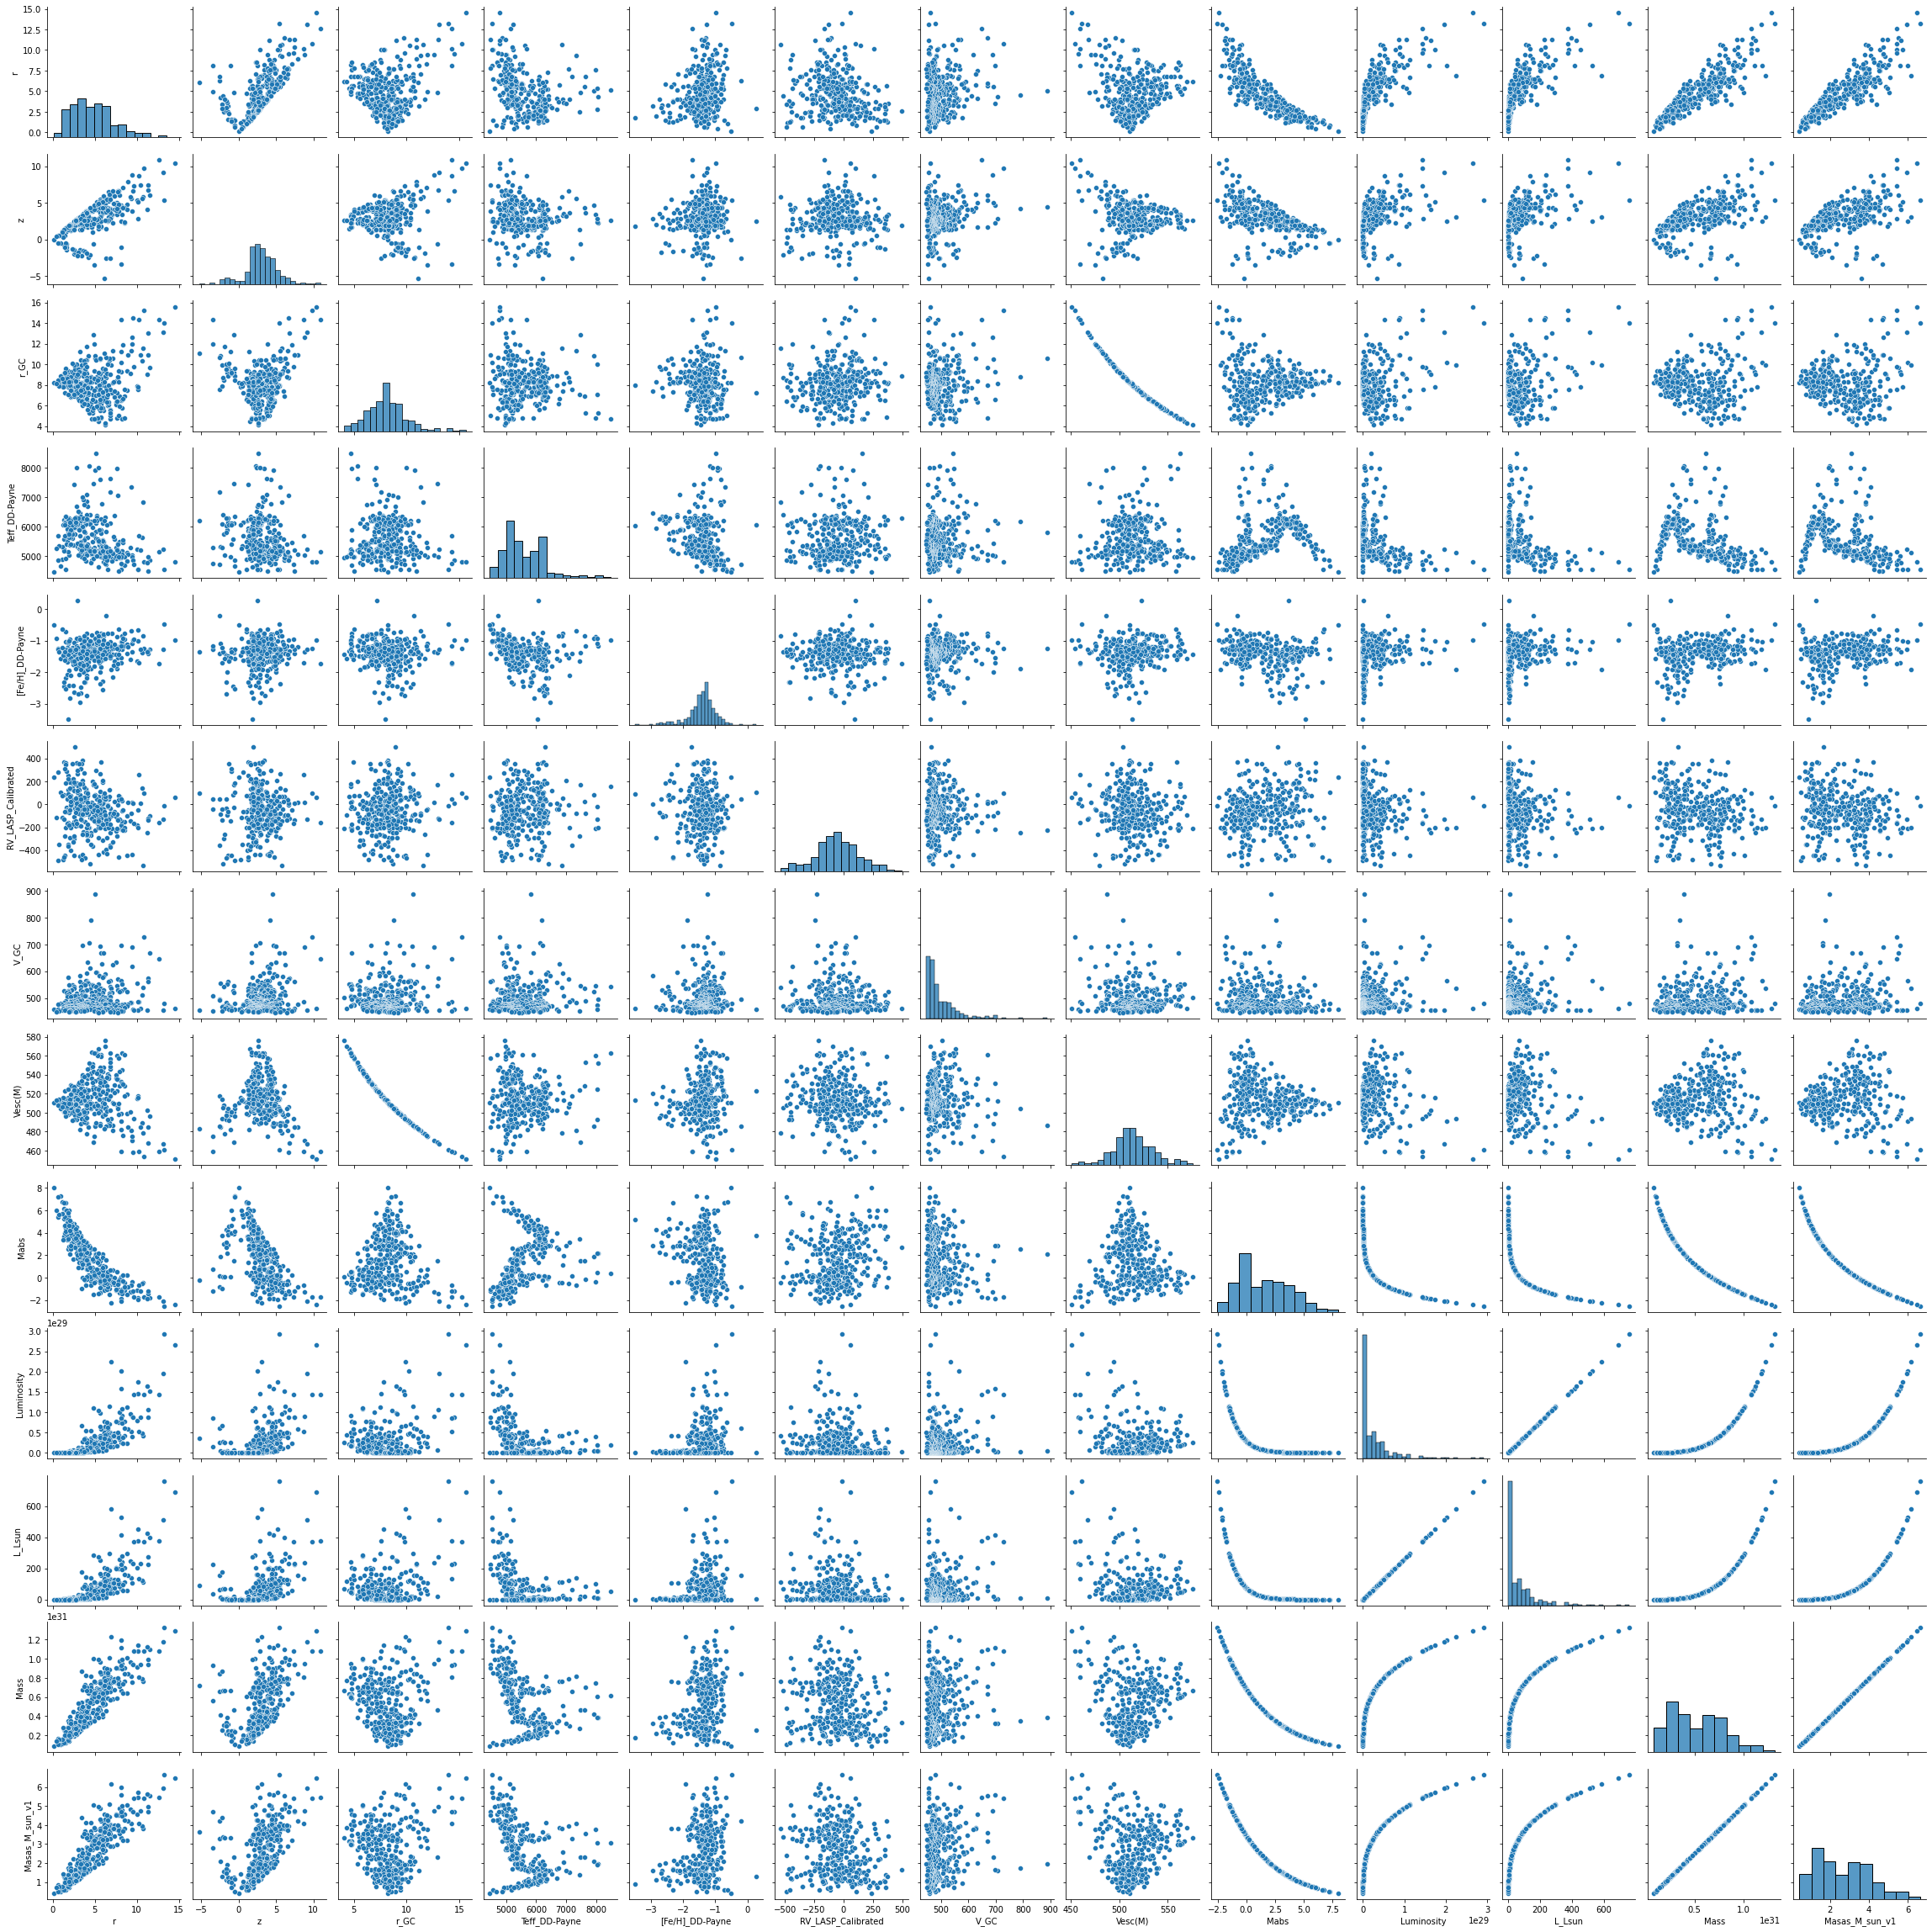

In [ ]:
# Grafiquemos relaciones entre variables
nuevo = df_OUT[['Origin_Class','r','z', 'r_GC',\
             'Teff_DD-Payne',\
             '[Fe/H]_DD-Payne',\
            'RV_LASP_Calibrated', 'V_GC',\
            'Vesc(M)',\
            'Mabs', 'Luminosity', 'L_Lsun', 'Mass','Masas_M_sun_v1' ]]

#sns.set(style='ticks',color_codes=True)
#grafica= sns.pairplot(nuevo, hue='[Fe/H]_LASP',palette='Spectral')
sns.pairplot(nuevo)
plt.savefig('Diagrama_all_parametros.png')


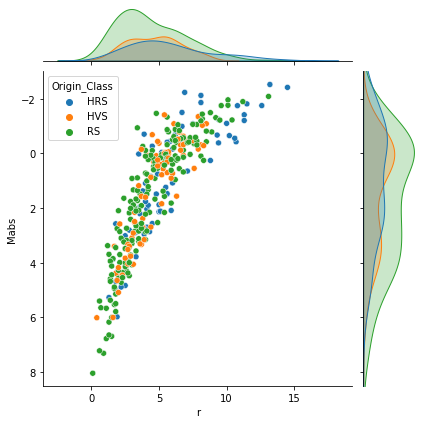

In [ ]:
sns.jointplot(data=nuevo, x="r", y="Mabs",hue='Origin_Class')
#plt.invert_yaxis()
plt.ylim(8.5,-3)
plt.savefig('Mabs_r_x_Origen.png')

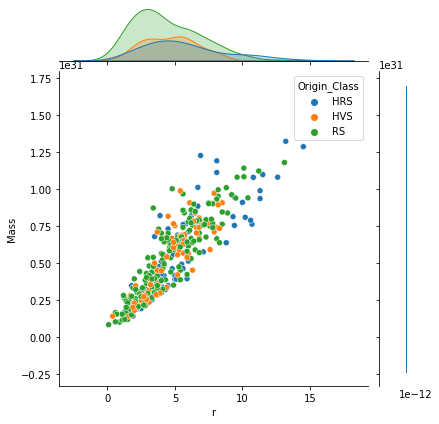

In [ ]:
sns.jointplot(data=nuevo, x="r", y="Mass",hue='Origin_Class')
#plt.invert_yaxis()
#plt.ylim(8.5,-3)
plt.savefig('Mass_r_x_Origen.png')

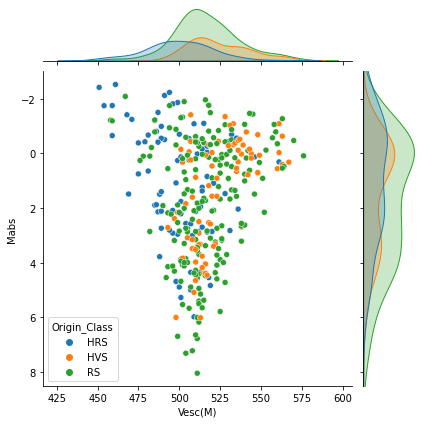

In [ ]:
axs = sns.jointplot(data=nuevo, x="Vesc(M)", y="Mabs",hue='Origin_Class')
#plt.invert_yaxis()
plt.ylim(8.5,-3)
plt.xlabel('Velocidad de escape en el potencial Bovy+2015')
plt.ylabel('Mabs[abs]')
#axs.set_xlabel('Velocidad de escape en el potencial Bovy+2015')
#axs.set_ylabel('Mabs[abs]')
plt.savefig('Mabs_x_Vel_esc_x_Origen.png')

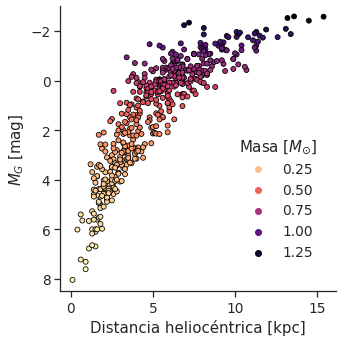

In [ ]:
sns.set_theme(style="ticks", font_scale=1.25)
g = sns.relplot(
    data=datos,
    x="r", y="Mabs", hue="Mass",
    palette="magma_r", marker=".", s=100, edgecolor='black',
)
g.set_axis_labels("Distancia heliocéntrica [kpc]", "$M_G$ [mag]")
g.legend.set_title(r"Masa $[M_{\odot}$]")
leg = g._legend
leg.set_bbox_to_anchor([0.75, 0.4])  # coordinates of lower left of bounding box
plt.ylim(8.5,-3)
plt.savefig('Mabs_r_x_Masa_exploratoria.png')


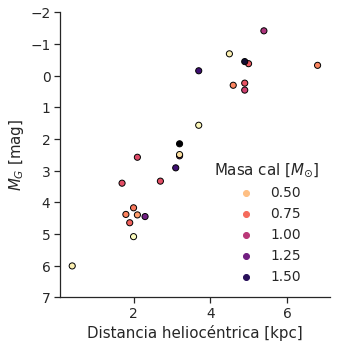

In [ ]:
h = sns.relplot(
    data=datos1,
    x="r", y="Mabs", hue="Masas_M_sun",
    palette="magma_r", marker=".", s=150, edgecolor='black',
)
h.set_axis_labels("Distancia heliocéntrica [kpc]", "$M_G$ [mag]")
h.legend.set_title(r"Masa cal $[M_{\odot}]$")
leg1 = h._legend
leg1.set_bbox_to_anchor([0.70, 0.35])  # coordinates of lower left of bounding box
plt.ylim(7,-2)
plt.savefig('Mabs_r_x_Masa.png')

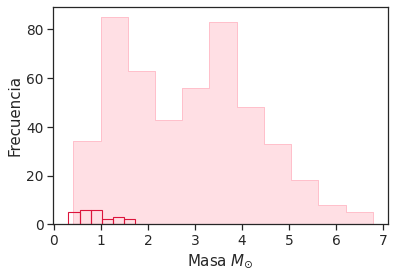

In [ ]:
axs = sns.histplot(data=datos, x="Masas_M_sun_v1",color='pink',alpha=0.5,element="step", label ='Masas')
sns.histplot(data=datos1,x="Masas_M_sun",color='crimson', fill=False)
axs.set_xlabel('Masa $M_{\odot}$')
axs.set_ylabel('Frecuencia')
plt.savefig('Masas_x_tipo_espectral.png')

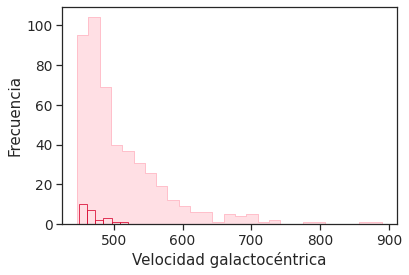

In [ ]:
axs = sns.histplot(data=datos, x="V_GC",color='pink',alpha=0.5,element="step")
sns.histplot(data=datos1,x="V_GC",color='crimson', fill=False,ax=axs)
axs.set_xlabel('Velocidad galactocéntrica')
axs.set_ylabel('Frecuencia')
plt.savefig('Histo_Vel.png')

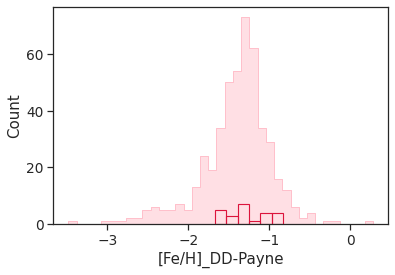

In [ ]:
sns.histplot(data=datos, x="[Fe/H]_DD-Payne",color='pink',alpha=0.5,element="step")
sns.histplot(data=datos1,x="[Fe/H]_DD-Payne",color='crimson', fill=False)
plt.savefig('Histo_Metal.png')

## Ahora hagamoslo para las 26 estrellas filtradas

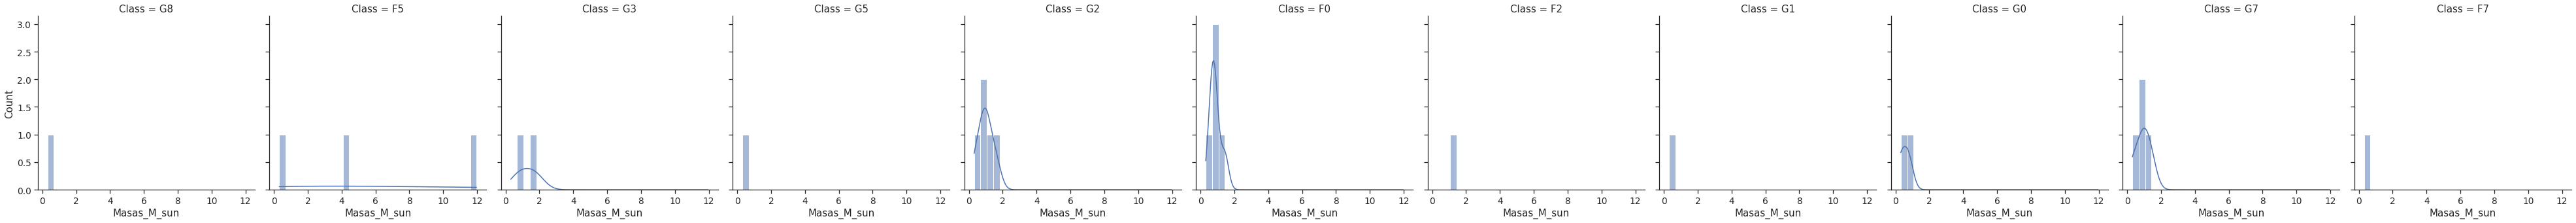

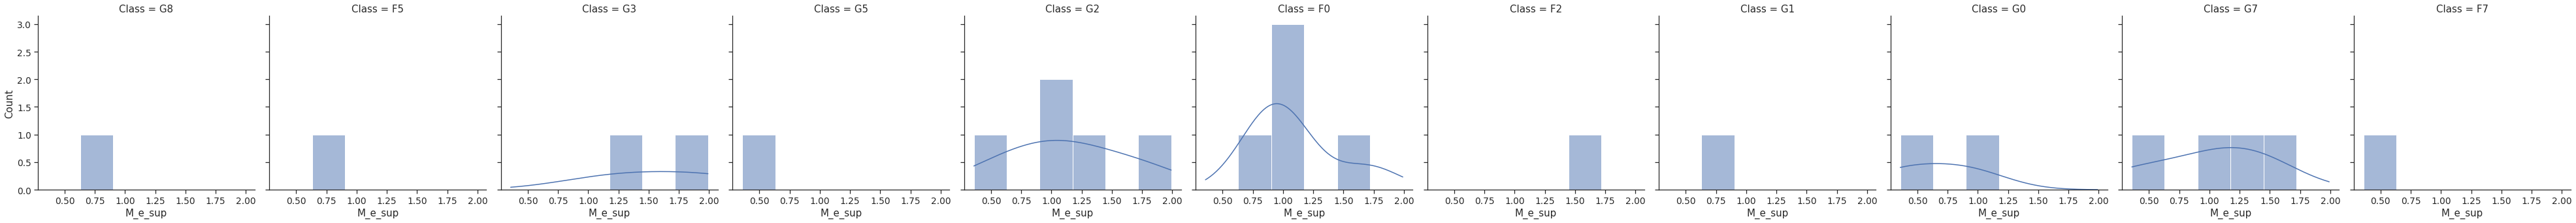

In [ ]:
sns.displot(data=datos2, x="Masas_M_sun", col="Class", kde=True)
sns.displot(data=datos2, x="M_e_sup", col="Class", kde=True)
#plt.savefig('Masas_x_tipo_espectral.png')

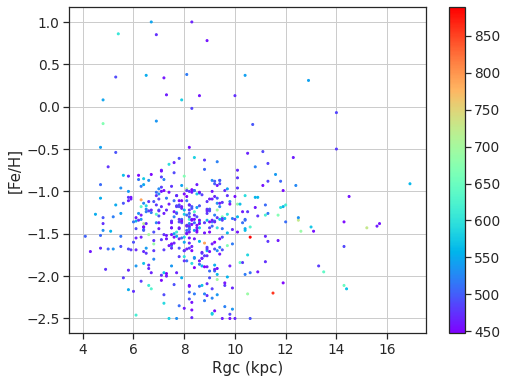

In [ ]:
#Ahora graficamos las metalicidades vs Rgc con la barra de velocidad.
x= datos['r_GC'] #Rgc
y= datos['[Fe/H]_LASP'] #Metalicidad
barra= datos['V_GC'] #velocidad calculada

fig, ax = plt.subplots(figsize=(8, 6))


plt.grid(b=None)
plt.xlabel('Rgc (kpc)')
plt.ylabel('[Fe/H]')
dispersion =ax.scatter(x, y, c=barra, cmap='rainbow',s=4)

fig.colorbar(dispersion)

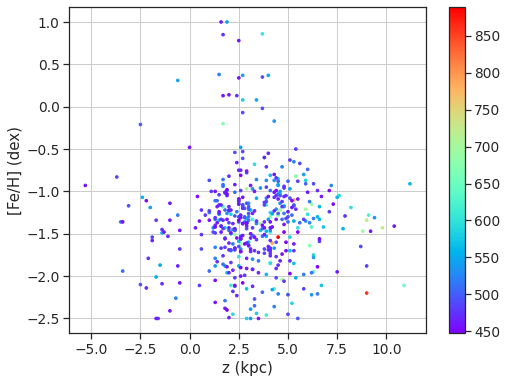

In [ ]:
x= datos['z'] #z
y= datos['[Fe/H]_LASP'] #Metalicidad
barra= datos['V_GC'] #velocidad calculada

fig, ax = plt.subplots(figsize=(8, 6))

plt.xlabel('z (kpc)')
plt.ylabel('[Fe/H] (dex)')
plt.grid(b=None)
dispersion =ax.scatter(x, y, c=barra, cmap='rainbow',s=7)

fig.colorbar(dispersion)

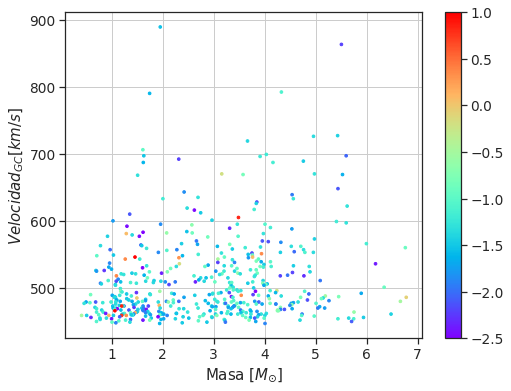

In [ ]:
x= datos['Masas_M_sun_v1'] #Masa
y= datos['V_GC'] #Velocidad galactocéntrica

barra= datos['[Fe/H]_LASP'] #Metalicidad

fig, ax = plt.subplots(figsize=(8, 6))
plt.grid(b=None)
plt.xlabel(r'Masa $[M_{\odot}]$')
plt.ylabel(r'$Velocidad_{GC} [km/s]$')

dispersion =ax.scatter(x, y, c=barra, cmap='rainbow',s=7)

fig.colorbar(dispersion)

##Hacemos un diagrama HR con los datos completos, sacando solo los flags = 0





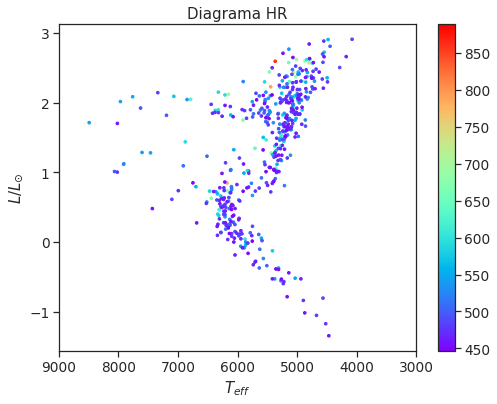

In [ ]:
#Ahora graficamos la Teff  vs Luminosidad con la barra de velocidad galactocéntrica.

fig, ax = plt.subplots(figsize=(8, 6))
x= datos['Teff_DD-Payne'] #Temperatura efectiva
y= np.log10(datos['L_Lsun']) #Luminosidad
barra= datos['V_GC'] #velocidad calculada
plt.xlim(9000,3000)

ax.set(title='Diagrama HR')
plt.ylabel(r'$L/L_{\odot}$')
plt.xlabel(r'$T_{eff}$')
dispersion =ax.scatter(x, y, c=barra,cmap='rainbow',s=7)

fig.colorbar(dispersion)

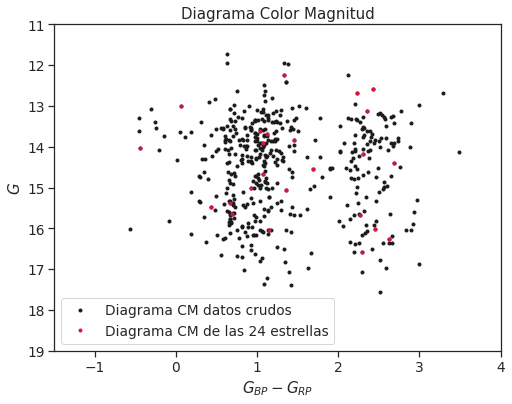

In [ ]:
#Ahora fusionamos esa primera isocrona con el diagrama HR

#Escala color magnitud
plt.figure(figsize=(8,6))

x = datos['G_BP']-datos['G_RP'] #Diferencia de color G Blue Pass - G Red Pass
y = datos['G'] #Magnitud en banda G

x3 = (datos1['G_BP']-datos1['G_RP']) #Temperatura efectiva
y3 = datos1['G'] #Luminosidad

plt.plot(x, y,'o', color='k',markersize=3.0, label = 'Diagrama CM datos crudos')

plt.plot(x3, y3,'o' ,color='crimson',markersize=3.0, label = 'Diagrama CM de las 24 estrellas')

plt.title("Diagrama Color Magnitud")
plt.xlabel("$G_{BP}-G_{RP}$")
plt.ylabel("$G$")
plt.xlim(-1.5,4)
plt.ylim(19,11)

plt.legend(loc='lower left')
plt.show()

Text(0, 0.5, 'Vesc(W) $[km/s]$')

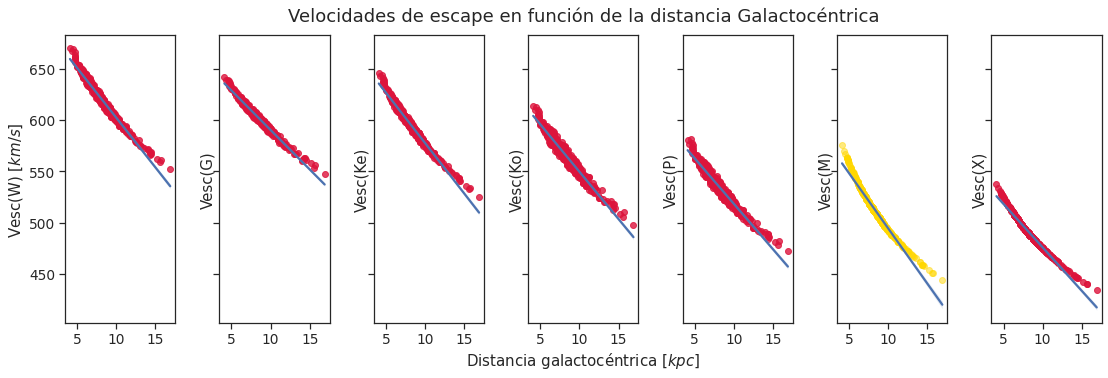

In [ ]:
# Gráfico de los siete potenciales
fig, axs = plt.subplots(1,7,sharey= True,figsize=(18,5))
fig.suptitle('Velocidades de escape en función de la distancia Galactocéntrica')
sns.regplot(x='r_GC', y='Vesc(W)', data=datos, dropna=True, units= None, ax=axs[0],color ='crimson',line_kws={'color':'b'})
sns.regplot(x='r_GC', y='Vesc(G)', data=datos, ax=axs[1],color ='crimson',line_kws={'color':'b'})
sns.regplot(x='r_GC', y='Vesc(Ke)', data=datos, dropna=True, ax=axs[2],color ='crimson',line_kws={'color':'b'})
sns.regplot(x='r_GC', y='Vesc(Ko)', data=datos, ax=axs[3],color ='crimson',line_kws={'color':'b'})
sns.regplot(x='r_GC', y='Vesc(P)', data=datos, dropna=True, ax=axs[4],color ='crimson',line_kws={'color':'b'})
sns.regplot(x='r_GC', y='Vesc(M)', data=datos, ax=axs[5], color ='gold',line_kws={'color':'b'},scatter_kws={'alpha':0.5})
sns.regplot(x='r_GC', y='Vesc(X)', data=datos, ax=axs[6],color ='crimson',line_kws={'color':'b'})
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
for i in range(7):  
  axs[i].set_xlabel('')
axs[3].set_xlabel(r'Distancia galactocéntrica $[kpc]$')
axs[0].set_ylabel(r'Vesc(W) $[km/s]$')  

#plt.tight_layout()